In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c4001-as27134/C4001_AS27134.csv


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import datetime
from fbprophet import Prophet

In [3]:
C4001_AS27134 = pd.read_csv('../input/c4001-as27134/C4001_AS27134.csv', usecols = ['year', 'month', 'stock_distributed'])

In [4]:
C4001_AS27134['day'] = 1

In [5]:
C4001_AS27134['Date'] = pd.to_datetime(C4001_AS27134 [["year", "month", 'day']])

In [6]:
C4001_AS27134.head()

,year,month,stock_distributed,day,Date
0,2016,1,10,1,2016-01-01
1,2016,3,60,1,2016-03-01
2,2016,4,42,1,2016-04-01
3,2016,5,51,1,2016-05-01
4,2016,6,48,1,2016-06-01


In [7]:
C4001_AS27134 = C4001_AS27134[['Date', 'stock_distributed']]

In [8]:
C4001_AS27134.dtypes

Date                 datetime64[ns]
stock_distributed             int64
dtype: object

In [9]:
C4001_AS27134.head(20)

,Date,stock_distributed
0,2016-01-01,10
1,2016-03-01,60
2,2016-04-01,42
3,2016-05-01,51
4,2016-06-01,48
5,2016-07-01,37
6,2016-08-01,35
7,2016-09-01,26
8,2016-10-01,26
9,2016-11-01,13


In [10]:
C4001_AS27134['Date'] = pd.to_datetime(C4001_AS27134['Date'] , format='%Y/%m/%d')
C4001_AS27134_ts = pd.Series(C4001_AS27134['stock_distributed'].values, index=C4001_AS27134['Date'], name='stock_distributed')
C4001_AS27134_ts .index = pd.DatetimeIndex(C4001_AS27134_ts .index, freq=C4001_AS27134_ts.index.inferred_freq)

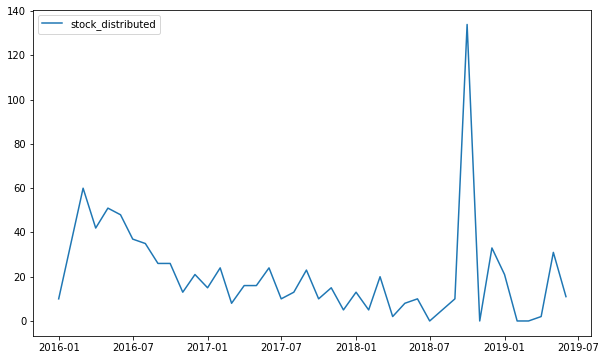

In [11]:
plt.figure(figsize=(10,6))
plt.plot(C4001_AS27134.set_index('Date'))
plt.legend(['stock_distributed'])

In [12]:
C4001_AS27134 = C4001_AS27134.rename(columns={'Date': 'ds', 'stock_distributed': 'y' })

In [13]:
C4001_AS27134.head()

,ds,y
0,2016-01-01,10
1,2016-03-01,60
2,2016-04-01,42
3,2016-05-01,51
4,2016-06-01,48


In [14]:
C4001_AS27134.tail()

,ds,y
36,2019-02-01,0
37,2019-03-01,0
38,2019-04-01,2
39,2019-05-01,31
40,2019-06-01,11


In [15]:
C4001_AS27134.max()

ds    2019-06-01 00:00:00
y                     134
dtype: object

In [16]:
C4001_AS27134.min()

ds    2016-01-01 00:00:00
y                       0
dtype: object

In [17]:
future = pd.DataFrame({'ds': ['2019-07-01', '2019-08-01', '2019-09-01']})

In [18]:
#future = pd.read_excel('../input/future/future.xlsx')

In [19]:
future.head()

,ds
0,2019-07-01
1,2019-08-01
2,2019-09-01


In [20]:
future['ds'] = pd.to_datetime(future_date['ds'], format='%Y/%m/%d')

NameError: name 'future_date' is not defined

In [21]:
future.head()

,ds
0,2019-07-01
1,2019-08-01
2,2019-09-01


In [22]:
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(C4001_AS27134)

In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-01,9.310440,-11.593591,32.053283
1,2019-08-01,3.859277,-17.977637,25.603416
2,2019-09-01,3.997047,-19.150323,24.563940


<Figure size 2160x1440 with 0 Axes>

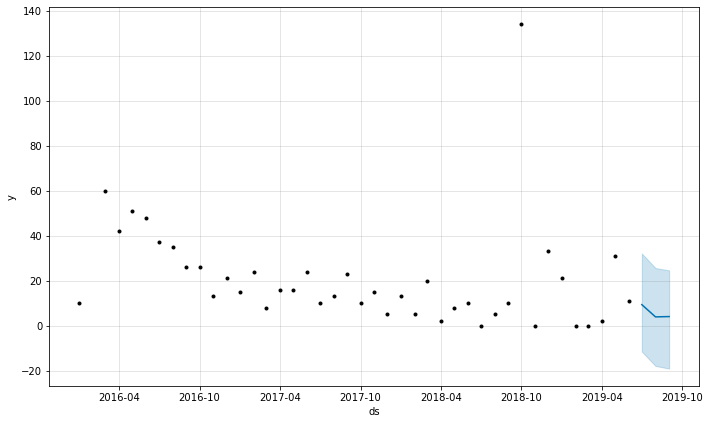

<Figure size 2160x1440 with 0 Axes>

In [24]:
confirmed_forecast_plot = m.plot(forecast)
plt.figure(figsize = (30,20))

<Figure size 2160x1440 with 0 Axes>

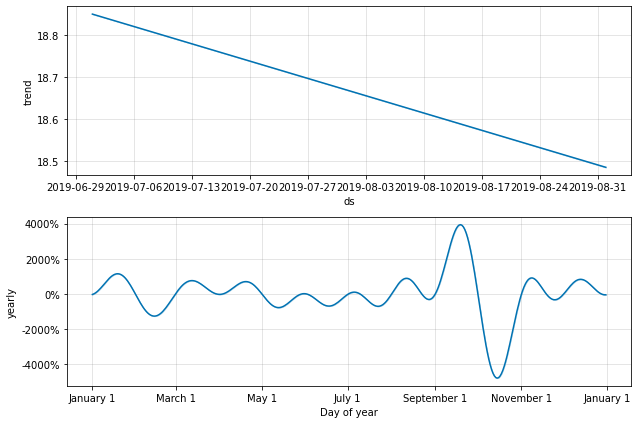

<Figure size 2160x1440 with 0 Axes>

In [25]:
confirmed_forecast_plot = m.plot_components(forecast)
plt.figure(figsize = (30,20))